In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
brands = pd.read_csv('brands.csv')
receipts = pd.read_csv('receipts.csv')
receipt_items = pd.read_csv('receipt_items.csv')
users = pd.read_csv('users.csv')


In [3]:
receiptsmerged = receipts.merge(receipt_items, left_on='ID', right_on='REWARDS_RECEIPT_ID')
receiptsmerged

,ID,STORE_NAME,PURCHASE_DATE,PURCHASE_TIME,DATE_SCANNED,TOTAL_SPENT,REWARDS_RECEIPT_STATUS,USER_ID,USER_VIEWED,PURCHASED_ITEM_COUNT,...,REWARDS_RECEIPT_ITEM_ID,DESCRIPTION,BARCODE,BRAND_CODE,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED,REWARDS_GROUP,ORIGINAL_RECEIPT_ITEM_TEXT,MODIFY_DATE_y
0,62868f660a72546bef0b2dd0,TOWN OF ROCKY MOUNT,2022-05-19T00:00:00Z,2:05 PM,2022-05-19T18:41:42.53Z,859.87,FINISHED,61375682c625197c5db73602,True,1.0,...,16c56fb28ecbec82e901331d68228f1f,abraxas LP,32032,NaN,1.0,859.87,NaN,NaN,CHCCK,2022-05-22T11:20:57.998Z
1,6269a4ea0a7241077408b6e1,FAMILY DOLLAR,2022-04-27T00:00:00Z,4:15 PM,2022-04-27T20:17:46.09Z,11.00,FINISHED,61578e96c2fb9321213720fc,True,2.0,...,11c57ddd5747d37822c897a25f9e7768,Homeline Concentrated Regular Bleach,032251542848,HOMELINE,1.0,5.50,NaN,NaN,HL CONCENTRATED REGULAR BLEACH 121FL OZ,2022-04-27T20:17:55.521Z
2,6269a4ea0a7241077408b6e1,FAMILY DOLLAR,2022-04-27T00:00:00Z,4:15 PM,2022-04-27T20:17:46.09Z,11.00,FINISHED,61578e96c2fb9321213720fc,True,2.0,...,3df03ec0abcaa96146a3f8591bd0f492,Homeline Concentrated Regular Bleach,032251542848,HOMELINE,1.0,5.50,NaN,NaN,HL CONCENTRATED REGULAR BLEACH 121FL OZ,2022-04-27T20:17:55.521Z
3,625b25e70a723eb9730d2c9c,PUBLIX,2022-04-15T00:00:00Z,4:45 PM,2022-04-16T20:24:07.259Z,10.67,FINISHED,6048de2ec9106b12d2b1ff61,True,4.0,...,89d8e7ea905aaa29b394affbab9fc9de,Snyder's of Hanover Jalapeno Pretzels Pieces,077975088234,SNYDER'S OF HANOVER,1.0,4.29,NaN,ROLD GOLD FLAVORED MULTI SERVE,SNYD PRTZL JALPENO,2022-04-16T20:24:24.064Z
4,625b25e70a723eb9730d2c9c,PUBLIX,2022-04-15T00:00:00Z,4:45 PM,2022-04-16T20:24:07.259Z,10.67,FINISHED,6048de2ec9106b12d2b1ff61,True,4.0,...,11193d868f3e636ab6cf219b16a7b941,SOUR BRITE CRAWLER,NaN,NaN,1.0,2.19,NaN,NaN,SOUR BRITE CRAWLER,2022-04-16T20:24:24.064Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360372,61b60d450a723af31e49e390,KOSTA'S GYROS,2021-12-09T00:00:00Z,12:38 AM,2021-12-12T14:55:01.235Z,24.86,FINISHED,607977220eb8310a043a61db,True,4.0,...,25d4fb522078bc29f6596927d9f1e0b8,"Hagerty Silversmiths Polish Spray, 8 Oz",011130140801,HAGERTY,1.0,6.59,NaN,NaN,HAR POLISH,2021-12-12T14:55:24.387Z
360373,61b60d450a723af31e49e390,KOSTA'S GYROS,2021-12-09T00:00:00Z,12:38 AM,2021-12-12T14:55:01.235Z,24.86,FINISHED,607977220eb8310a043a61db,True,4.0,...,3f358371f1d8cab31a4a6c9dfe8ee01a,MALE,NaN,NaN,1.0,2.59,NaN,NaN,MALE,2021-12-12T14:55:24.387Z
360374,61b60d450a723af31e49e390,KOSTA'S GYROS,2021-12-09T00:00:00Z,12:38 AM,2021-12-12T14:55:01.235Z,24.86,FINISHED,607977220eb8310a043a61db,True,4.0,...,df295f6fb8c91c4db1903b3fc78c5b1f,W OF CHICK 32OZ,NaN,NaN,1.0,8.09,NaN,NaN,W OF CHICK 32OZ,2021-12-12T14:55:24.387Z
360375,632e34fc0a7247339f0fac00,DOLLAR GENERAL STORE,2022-09-23T00:00:00Z,6:20 PM,2022-09-23T22:36:44.617Z,8.43,FINISHED,608ffd8c081f0303ca513daf,True,2.0,...,a32aa0c1654531f5944bfe87d897289b,"Clover Valley Sour Cream, 16oz",070744009768,CLOVER VALLEY,1.0,2.40,NaN,NaN,CV SOUR CREAM,2022-09-23T22:36:54.496Z


I have grouped the receipt_items and receipts table by the receipt's ID. This was done in an effort to make the rest of the code easier to write.

Text(0, 0.5, 'Total spent per brand')

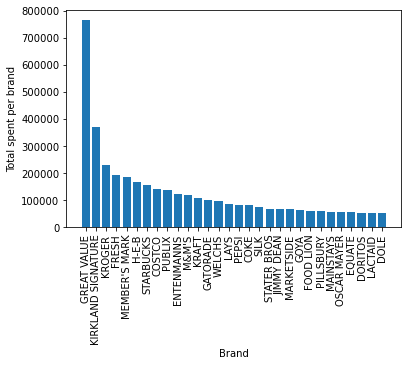

In [4]:
g2 = receiptsmerged.groupby(by = ['BRAND_CODE'], as_index = False).sum()
g2 = g2.sort_values(by='TOTAL_SPENT', ascending=False)[:30]
plt.bar(g2['BRAND_CODE'], g2['TOTAL_SPENT'])
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Total spent per brand')

I have grouped the sum of the total spent per brand. As shown here, Great Value has a much higher total sales in the time this data was collected than other companies, even including Starbucks and Kroger. This is to be expected, however, as Great Value items are sold at a lower price because of lower marketing and advertising expense, thus attracting more overall sales.

In [5]:
storegrouped = receiptsmerged.groupby(by = ['STORE_NAME'], as_index = False).sum()
storegrouped = storegrouped.sort_values(by='TOTAL_SPENT', ascending=False)[:30]
storegrouped

,STORE_NAME,TOTAL_SPENT,PURCHASED_ITEM_COUNT,PROCESSED_DATE,DIGITAL_RECEIPT,ITEM_INDEX,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED
5459,WALMART,8298204.72,2014272.0,0.0,1462,937739,77138.0,383343.67,208098.8
1265,COSTCO,2263483.97,201378.0,0.0,236,90098,11252.0,131376.42,83857.7
4308,SAM'S CLUB,1420007.08,132666.0,0.0,125,61718,8050.0,95309.12,58778.5
3983,PUBLIX,1222617.11,280622.0,0.0,606,129371,13273.0,61721.60,45389.9
2245,H-E-B,1092978.33,202048.0,0.0,351,78003,7700.0,43161.03,17506.2
796,BURLINGTON,1009009.45,1765.0,0.0,0,734,298.0,158594.05,0.0
29,380 LENOX MEAT CORPORATION,976053.01,5266.0,0.0,0,1748,595.0,125721.85,613.5
2734,KROGER,916766.67,305214.0,0.0,21,144968,8846.0,30404.07,23971.3
4904,TARGET,879959.78,153452.0,0.0,451,57206,12958.0,84634.07,34850.4
5022,THE HOME DEPOT,841850.79,53134.0,0.0,16,11346,6770.0,144628.67,787.0


I have done yet another grouping, this time on the Store name.

Text(0, 0.5, 'Total spent at each store')

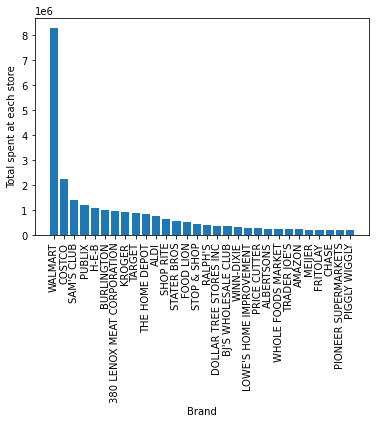

In [6]:
plt.bar(storegrouped['STORE_NAME'], storegrouped['TOTAL_SPENT'])
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Total spent at each store')

I have calculated the total amount spent per store. Walmart is at the top of the pack, followed by Costco and Sam's club. This makes sense, as Walmart is an extremely popular choice to shop with 4,648 locations in America, with Costco and Sam's club also having a sizeable amount of locations as well. This also correlates with the previous graph, as Great Value forms the second tier of Walmart's grocery branding strategy, making sense as to why both have a large amount of total sales, and as a result, revenue.

Text(0, 0.5, 'Total spent')

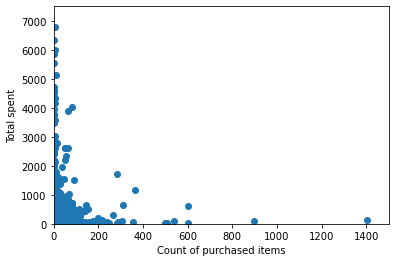

In [7]:
groupedbysum = receipts.groupby(by = ['ID'], as_index = False).sum()
groupedbysum1 = groupedbysum[['PURCHASED_ITEM_COUNT', 'TOTAL_SPENT']]
plot2 = plt.scatter(groupedbysum1['PURCHASED_ITEM_COUNT'], groupedbysum1['TOTAL_SPENT'])
plt.xlim(0,1500)
plt.ylim(0,7500)
plt.xlabel('Count of purchased items')
plt.ylabel('Total spent')

I have plotted the amount of purchased items along with the total spent per item. As you can see here, there is an inverse relationship betwween the two variables. This makes sense, as there are many items that are bought only once that are extremely expensive, and there are many items that are bought hundreds and thousands of times that are extremely cheap.

Text(0, 0.5, 'Total spent per month')

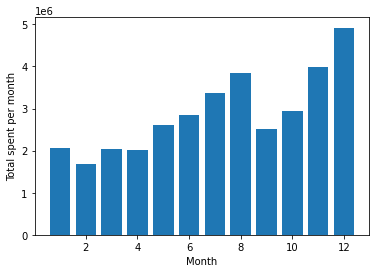

In [8]:
receiptsmerged['Month'] = pd.to_datetime(receiptsmerged['PURCHASE_DATE']).dt.month
receiptsbymonth = receiptsmerged.groupby(by=['Month'], as_index = False).sum()
plt.bar(receiptsbymonth['Month'], receiptsbymonth['TOTAL_SPENT'])
plt.xlabel('Month')
plt.ylabel('Total spent per month')

This bar plot shows the total amount spent per month. There are two noticeable ticks, one around August and one around December. This correlates to the two times of the year when people typically spend the most, when they go back to school and around Christmastime, when everybody likes to make a habit of buying gifts for others.

Text(0, 0.5, 'Number of items bought per month')

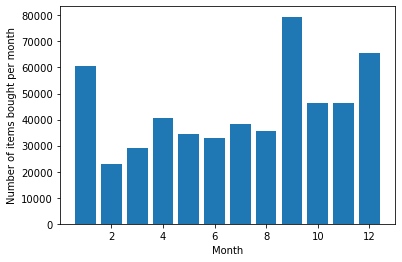

In [9]:
plt.bar(receiptsbymonth['Month'], receiptsbymonth['QUANTITY_PURCHASED'])
plt.xlabel('Month')
plt.ylabel('Number of items bought per month')

This bar plot shows the total items bought per month. There are two ticks, one around the start of the new year and one around September. This also makes sense; as aforementioned before many people like to buy things at the start of the school year, and many companies have to restock their inventories at the start of the new calendar year.